In [1]:
from keras.datasets import imdb

2024-01-27 22:37:15.503489: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 3s 0us/step


In [4]:
train_labels[0]

1

In [10]:
max([max(item) for item in train_data])

9999

In [13]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)

decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [15]:
import numpy as np

In [16]:
def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):

        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [17]:
y_train = np.asanyarray(train_labels).astype('float32')
y_test = np.asanyarray(test_labels).astype('float32')

In [18]:
from keras import models
from keras import layers

In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid',))

In [20]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [22]:
x_val =x_train[:10000]
partial_x_train = x_train[10000:]

y_val =y_train[:10000]
partial_y_train = y_train[10000:]

In [25]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 54ms/step - loss: 0.0084 - accuracy: 0.9996 - val_loss: 0.6830 - val_accuracy: 0.8574
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0077 - accuracy: 0.9995 - val_loss: 0.7733 - val_accuracy: 0.8488
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0077 - accuracy: 0.9995 - val_loss: 0.6847 - val_accuracy: 0.8623
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0081 - accuracy: 0.9989 - val_loss: 0.6591 - val_accuracy: 0.8687
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0040 - accuracy: 0.9998 - val_loss: 0.6732 - val_accuracy: 0.8687
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0120 - accuracy: 0.9971 - val_loss: 0.6908 - val_accuracy: 0.8690
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0028 - accuracy: 0.9999 - val_loss: 0.7087 - val_accuracy: 0.8686
Epoch 8/20
30

In [24]:
import matplotlib.pyplot as plt

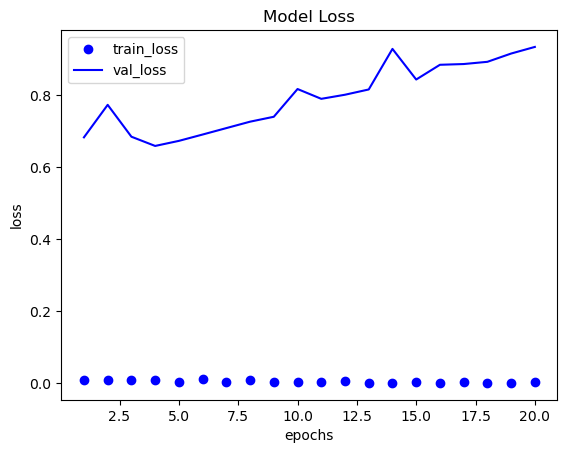

In [27]:
loss_vals = history.history['loss']
val_loss_vals = history.history['val_loss']
epochs = range(1, len(loss_vals) + 1)
plt.plot(epochs, loss_vals, 'bo')
plt.plot(epochs, val_loss_vals, 'b')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [65]:
def plot_param(param_train, param_val, title, x, y):
    epochs = range(1, len(param_train) + 1)
    plt.plot(epochs, param_train, 'bo')
    plt.plot(epochs, param_val, 'b')
    plt.title(title)
    plt.ylabel(y)
    plt.xlabel(x)
    plt.legend(['train', 'val'])
    plt.show()

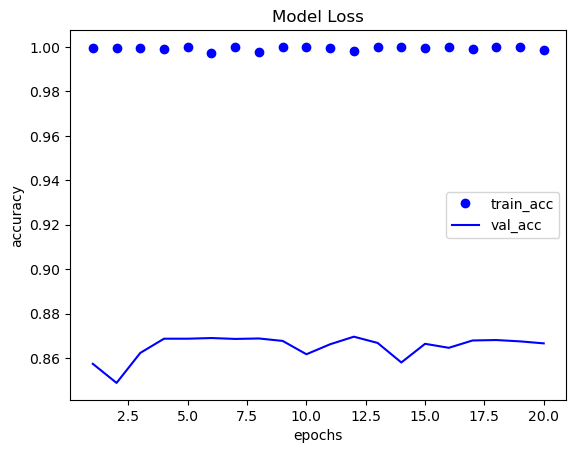

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo')
plt.plot(epochs, val_acc, 'b')
plt.title('Model Loss')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train_acc', 'val_acc'])
plt.show()

In [29]:
from keras.datasets import reuters

In [30]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 1s 0us/step


In [57]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)

decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_review)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [48]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [49]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [50]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

"""
Or use the inbuilt function to perfrom onehot encoding

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
"""

'\nOr use the inbuilt function to perfrom onehot encoding\n\nfrom keras.utils.np_utils import to_categorical\n\none_hot_train_labels = to_categorical(train_labels)\none_hot_test_labels = to_categorical(test_labels)\n'

In [51]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [52]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [54]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]



[0. 1. 1. ... 0. 0. 0.]


In [69]:
history1 = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val), shuffle=True)

Epoch 1/9
16/16 [==============================] - 1s 34ms/step - loss: 0.0946 - acc: 0.9599 - val_loss: 1.0619 - val_acc: 0.8140
Epoch 2/9
16/16 [==============================] - 0s 20ms/step - loss: 0.0992 - acc: 0.9570 - val_loss: 1.1621 - val_acc: 0.8050
Epoch 3/9
16/16 [==============================] - 0s 26ms/step - loss: 0.0978 - acc: 0.9590 - val_loss: 1.1051 - val_acc: 0.8010
Epoch 4/9
16/16 [==============================] - 0s 21ms/step - loss: 0.0961 - acc: 0.9597 - val_loss: 1.0714 - val_acc: 0.8120
Epoch 5/9
16/16 [==============================] - 0s 19ms/step - loss: 0.0945 - acc: 0.9575 - val_loss: 1.1002 - val_acc: 0.8130
Epoch 6/9
16/16 [==============================] - 0s 19ms/step - loss: 0.0951 - acc: 0.9589 - val_loss: 1.1254 - val_acc: 0.8060
Epoch 7/9
16/16 [==============================] - 0s 18ms/step - loss: 0.0968 - acc: 0.9589 - val_loss: 1.1161 - val_acc: 0.8070
Epoch 8/9
16/16 [==============================] - 0s 19ms/step - loss: 0.0899 - acc: 0.95

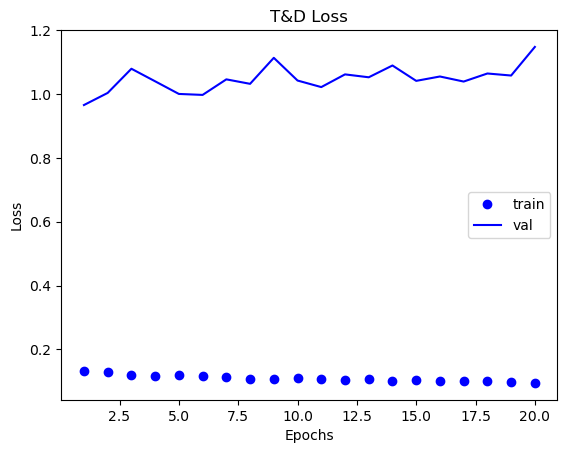

In [68]:
acc = history1.history['loss']
val_acc = history1.history['val_loss']

plot_param(acc, val_acc, 'T&D Loss', 'Epochs', 'Loss')

In [70]:
model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 3ms/step - loss: 1.2309 - acc: 0.7934


[1.2308592796325684, 0.7934104800224304]

In [71]:
model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


array([[5.07734121e-08, 6.86117048e-08, 5.73322001e-10, ...,
        2.57217692e-09, 3.97657546e-10, 5.54466993e-11],
       [5.03029753e-07, 1.05280359e-03, 5.30578720e-04, ...,
        1.34244907e-10, 1.82613430e-12, 2.60012598e-06],
       [1.10376813e-03, 9.82371092e-01, 4.15200717e-04, ...,
        1.34887807e-06, 2.62817508e-07, 4.68520830e-06],
       ...,
       [2.19209369e-06, 1.99166770e-05, 2.73891010e-06, ...,
        6.29927683e-07, 6.42886278e-07, 3.00441883e-07],
       [1.12555084e-04, 1.84181109e-02, 1.08073023e-03, ...,
        3.16922014e-05, 1.58753608e-07, 1.99515785e-06],
       [9.95528444e-06, 9.67177272e-01, 1.50720100e-03, ...,
        7.06752417e-08, 9.86730875e-09, 1.09383348e-06]], dtype=float32)